<a href="https://colab.research.google.com/github/sbtnoob12/BDA-Alcohol/blob/dimension_reduction/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [3]:
df1 = pd.read_csv('student-mat.csv')
df2 = pd.read_csv('student-por.csv')
student_df = pd.concat([df1,df2],axis = 0)

# New Section

In [4]:
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
# Check if there is NA value - There is no NA value in the dataset
student_df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
# Add column Weekly Conumption - AlWeekly_Cons as the sum of 'Dalc' & 'Walc'
student_df['AlWeekly_Cons'] = student_df['Dalc']+ student_df['Walc'] # 1- 10

# Drop column G1 and G2 as we only need G3 - final grade and drop 'Dalc' and 'Walc' because we have the weekly sum
student_df = student_df.drop(columns = ['G1','G2','Dalc','Walc'],axis = 1)


In [7]:
# Add Success column with two value yes and no based on the G3 column
# We choose threshold of 11 to decide whether a student is academically successful or not (1 point bigger than average which is 10)
student_df['Success'] = student_df.apply(lambda x: 'yes' if x['G3'] >= 11 else 'no',axis = 1)
print(student_df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  internet romantic  famrel  freetime  goout health absences  G3  \
0       no       no       4         3      4      3        6   6   
1      yes       no       5         3      3      3        4   6   
2      yes       no       4         3      2      3       10  10   
3      yes      yes       3         2      2      5        2  15   
4       no       no       4         3      2      5        4  10   

  AlWeekly_Cons Success  
0             2      no  
1             2      no  
2             5      no  


# Exploratory Data Analysis

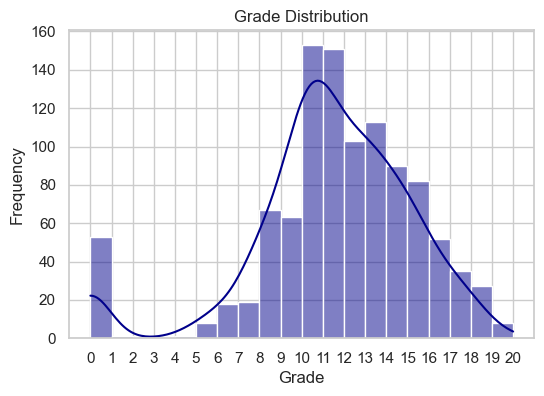

In [ ]:
# Student Final Grades Distribution
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.histplot(data=student_df, x='G3', kde=True, color='darkblue',bins = list(range(0,21)))
plt.title("Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Frequency")
custom_xticks = list(range(0,21))
plt.xticks(custom_xticks)
# Show the plot
plt.show()

In [ ]:
# We choose 11 as a threshold to determine whether they have good grade or not
low_point_perc = len(student_df[student_df['G3']<11])/len(student_df) * 100
print(str(round(low_point_perc,2))+'%')

36.69%


From the graph, most of the student has good grade (> 11 which is the avergae as grade run from 0-20). However, we still have around 36.69% students with the grade < 11 (0-10) and we will put a graph on those students with the alcohol affect later

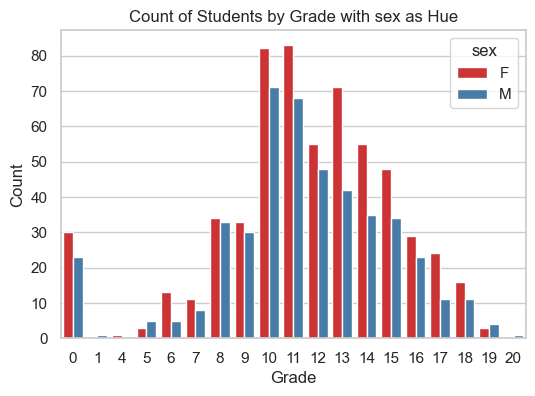

In [ ]:
# Student sex and grade
plt.figure(figsize=(6, 4))
sns.countplot(data=student_df, x='G3', hue='sex', palette='Set1')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Count of Students by Grade with sex as Hue')
plt.legend(title='sex')

plt.show()


In [ ]:
female_average_point = student_df[student_df['sex']== 'F']['G3'].mean()
male_average_point = student_df[student_df['sex']== 'M']['G3'].mean()
female_count = len(student_df[student_df['sex']== 'F'])
male_count = len(student_df[student_df['sex']== 'M'])
print(female_count)
print(male_count)
print(round(female_average_point,2))
print(round(male_average_point,2))

591
453
11.45
11.2


From the second graph, it looks like female student performs better than male students. However, when calculating average points, they are slighly equal as female point is 11.45 and male point is 11.2. Thus, sex does not play any vital role in this analysis.

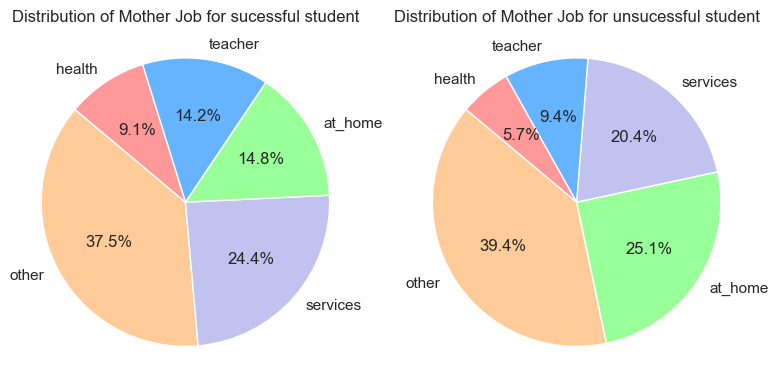

In [ ]:
# Pie chart of Successful and unsuccesful student based on mother job

success_job_distribution = student_df[student_df['Success'] == 'yes']['Mjob'].value_counts()
unsuccess_job_distribution = student_df[student_df['Success'] == 'no']['Mjob'].value_counts()
colors = {'health':'#ff9999','teacher': '#66b3ff','at_home':'#99ff99', 'other':'#ffcc99', 'service':'#c2c2f0'}

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Create the first pie chart for sucessful student
wedges, texts, autotexts = axs[0].pie(
    success_job_distribution,
    labels=success_job_distribution.index,
    colors=[colors.get(job, '#c2c2f0') for job in success_job_distribution.index],  # Use custom colors
    autopct='%1.1f%%',
    startangle=140,)

axs[0].set_title('Distribution of Mother Job for sucessful student')
axs[0].axis('equal')

# Create the first pie chart for unsucessful student
wedges, texts, autotexts = axs[1].pie(
    unsuccess_job_distribution,
    labels=unsuccess_job_distribution.index,
    colors=[colors.get(job, '#c2c2f0') for job in unsuccess_job_distribution.index],  # Use custom colors
    autopct='%1.1f%%',
    startangle=140,)

axs[1].set_title('Distribution of Mother Job for unsucessful student')
axs[1].axis('equal')

plt.tight_layout()
plt.show()


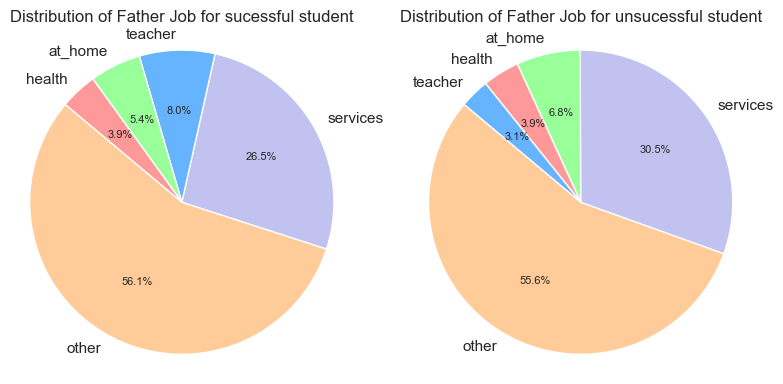

In [ ]:
# Pie chart of Successful and unsuccesful student based on father job

f_success_job_distribution = student_df[student_df['Success'] == 'yes']['Fjob'].value_counts()
f_unsuccess_job_distribution = student_df[student_df['Success'] == 'no']['Fjob'].value_counts()
colors = {'health':'#ff9999','teacher': '#66b3ff','at_home':'#99ff99', 'other':'#ffcc99', 'service':'#c2c2f0'}

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Create the first pie chart for sucessful student
wedges, texts, autotexts = axs[0].pie(
    f_success_job_distribution,
    labels=f_success_job_distribution.index,
    colors=[colors.get(job, '#c2c2f0') for job in f_success_job_distribution.index],  # Use custom colors
    autopct='%1.1f%%',
    startangle=140,)

for autotext in autotexts:
    autotext.set(size=8)

axs[0].set_title('Distribution of Father Job for sucessful student')
axs[0].axis('equal')

# Create the first pie chart for unsucessful student
wedges, texts, autotexts = axs[1].pie(
    f_unsuccess_job_distribution,
    labels=f_unsuccess_job_distribution.index,
    colors=[colors.get(job, '#c2c2f0') for job in f_unsuccess_job_distribution.index],  # Use custom colors
    autopct='%1.1f%%',
    startangle=140,)

for autotext in autotexts:
    autotext.set(size=8)

axs[1].set_title('Distribution of Father Job for unsucessful student')
axs[1].axis('equal')

plt.tight_layout()
plt.show()


0: None , 1: Primary education (4th grade) , 2: Primary Education (5 - 9th grade), 3: Secondary education
4: Higher Education 


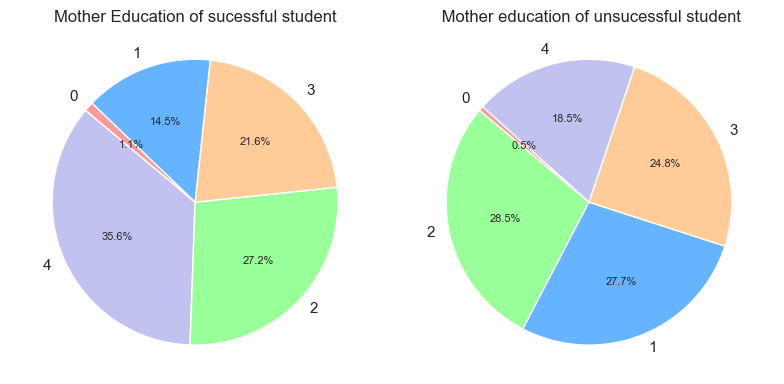

In [ ]:
# Pie chart of Successful and unsuccesful student based on mother education

success_mother_education = student_df[student_df['Success'] == 'yes']['Medu'].value_counts()
unsuccess_mother_education = student_df[student_df['Success'] == 'no']['Medu'].value_counts()
colors = {0:'#ff9999',1: '#66b3ff',2:'#99ff99', 3:'#ffcc99', 4:'#c2c2f0'}

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Create the first pie chart for sucessful student
wedges, texts, autotexts = axs[0].pie(
    success_mother_education,
    labels=success_mother_education.index,
    colors=[colors.get(job, '#c2c2f0') for job in success_mother_education.index],  # Use custom colors
    autopct='%1.1f%%',
    startangle=140,)
for autotext in autotexts:
    autotext.set(size=8)

axs[0].set_title('Mother Education of sucessful student')
axs[0].axis('equal')

# Create the first pie chart for unsucessful student
wedges, texts, autotexts = axs[1].pie(
    unsuccess_mother_education,
    labels=unsuccess_mother_education.index,
    colors=[colors.get(job, '#c2c2f0') for job in unsuccess_mother_education.index],  # Use custom colors
    autopct='%1.1f%%',
    startangle=140,)

for autotext in autotexts:
    autotext.set(size=8)

axs[1].set_title(' Mother education of unsucessful student')
axs[1].axis('equal')

print("0: None , 1: Primary education (4th grade) , 2: Primary Education (5 - 9th grade), 3: Secondary education")
print("4: Higher Education ")
plt.tight_layout()
plt.show()

0: None , 1: Primary education (4th grade) , 2: Primary Education (5 - 9th grade), 3: Secondary education
4: Higher Education 


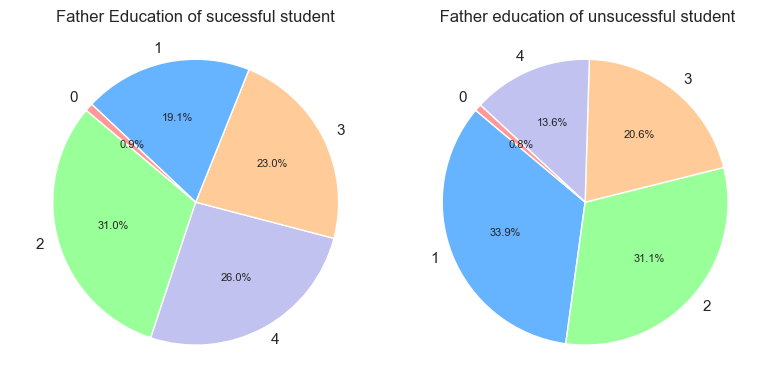

In [ ]:
# Pie chart of Successful and unsuccesful student based on father education

success_father_education = student_df[student_df['Success'] == 'yes']['Fedu'].value_counts()
unsuccess_father_education = student_df[student_df['Success'] == 'no']['Fedu'].value_counts()
colors = {0:'#ff9999',1: '#66b3ff',2:'#99ff99', 3:'#ffcc99', 4:'#c2c2f0'}

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Create the first pie chart for sucessful student
wedges, texts, autotexts = axs[0].pie(
    success_father_education,
    labels=success_father_education.index,
    colors=[colors.get(job, '#c2c2f0') for job in success_father_education.index],  # Use custom colors
    autopct='%1.1f%%',
    startangle=140,)
for autotext in autotexts:
    autotext.set(size=8)

axs[0].set_title('Father Education of sucessful student')
axs[0].axis('equal')

# Create the first pie chart for unsucessful student
wedges, texts, autotexts = axs[1].pie(
    unsuccess_father_education,
    labels=unsuccess_father_education.index,
    colors=[colors.get(job, '#c2c2f0') for job in unsuccess_father_education.index],  # Use custom colors
    autopct='%1.1f%%',
    startangle=140,)

for autotext in autotexts:
    autotext.set(size=8)

axs[1].set_title(' Father education of unsucessful student')
axs[1].axis('equal')

print("0: None , 1: Primary education (4th grade) , 2: Primary Education (5 - 9th grade), 3: Secondary education")
print("4: Higher Education ")
plt.tight_layout()
plt.show()

We see there is no significant difference between mother's and father's job of successfull or unsuccessful students. The only thing noticeable thing is successfull kids have higher percentage of either mom or dad (or both) is teacher. Also, unsuccessful kids have higher percentage of mom stays at home.

Moving on to education, the difference is quite significant. For successful kids, their parents tend to have secondary education or higher while unsuccessful kids's parent usually have Primary Education. We will examine whether parent's education effect their kid's alcohol consuming behavior.

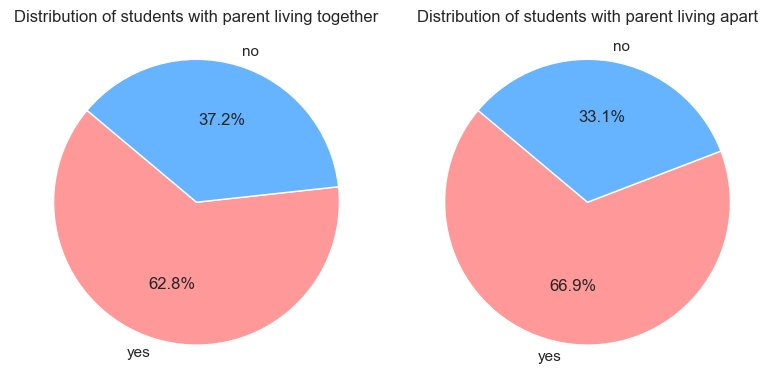

In [ ]:
# Pie chart of Successful and unsuccesful student based on parental's cohabitation - living together or apart

living_parental = student_df[student_df['Pstatus'] == 'T']['Success'].value_counts()
apart_parental = student_df[student_df['Pstatus'] == 'A']['Success'].value_counts()
cus_colors = {'yes':'#ff9999','no': '#66b3ff'}

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Create the first pie chart for Living together parent
wedges, texts, autotexts = axs[0].pie(
    living_parental,
    labels=living_parental.index,
    colors=[cus_colors.get(job, '#c2c2f0') for job in living_parental.index],  # Use custom colors
    autopct='%1.1f%%',
    startangle=140,)


axs[0].set_title('Distribution of students with parent living together')
axs[0].axis('equal')

# Create the first pie chart for living apart parent
wedges, texts, autotexts = axs[1].pie(
    apart_parental,
    labels=apart_parental.index,
    colors=[cus_colors.get(job, '#c2c2f0') for job in apart_parental.index],  # Use custom colors
    autopct='%1.1f%%',
    startangle=140,)


axs[1].set_title('Distribution of students with parent living apart')
axs[1].axis('equal')

plt.tight_layout()
plt.show()

There is no difference between parent if they living together or not, the success of their kids have the same distribution

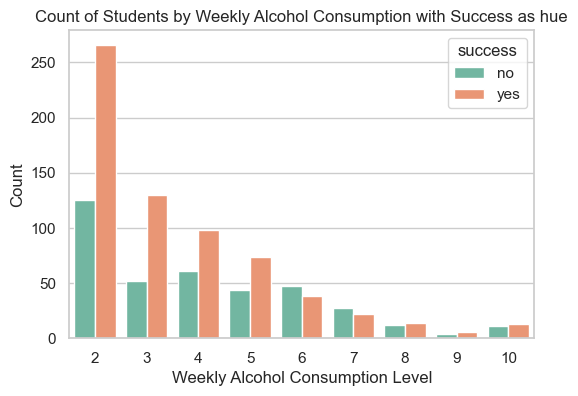

In [ ]:
# Weekly alcohol consumption between successful and unsuccessful students
plt.figure(figsize=(6, 4))
sns.countplot(data=student_df, x='AlWeekly_Cons', hue='Success', palette='Set2')
plt.xlabel('Weekly Alcohol Consumption Level')
plt.ylabel('Count')
plt.title('Count of Students by Weekly Alcohol Consumption with Success as hue')
plt.legend(title='success')

plt.show()


In general, students drink. However, successful students' alcohol consume level range from low to mid (2-4), while unsuccesful students' range from 6 to 10 which means the alcohol consumption does affect the grade in school. If you drink more, there is high chance your grade will go down.

We will find if parental living status has any relation with alcohol weekly comption level or not in the next graph.

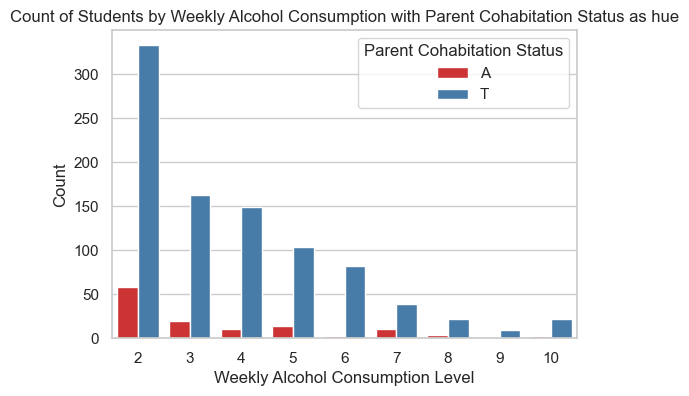

In [ ]:
# Weekly alcohol consumption between students who have living together vs apart parent
plt.figure(figsize=(6, 4))
sns.countplot(data=student_df, x='AlWeekly_Cons', hue='Pstatus', palette='Set1')
plt.xlabel('Weekly Alcohol Consumption Level')
plt.ylabel('Count')
plt.title('Count of Students by Weekly Alcohol Consumption with Parent Cohabitation Status as hue')
plt.legend(title='Parent Cohabitation Status')

plt.show()

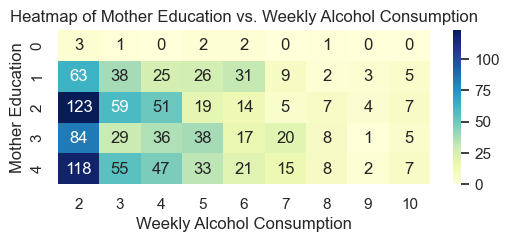

In [ ]:
# Create a heatmap
pivot_table = student_df.pivot_table(index='Medu', columns='AlWeekly_Cons', aggfunc='size', fill_value=0)
plt.figure(figsize=(6, 2))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.xlabel('Weekly Alcohol Consumption')
plt.ylabel('Mother Education')
plt.title('Heatmap of Mother Education vs. Weekly Alcohol Consumption')

plt.show()



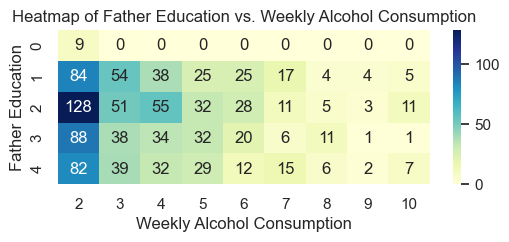

In [ ]:
# Create a heatmap
pivot_table = student_df.pivot_table(index='Fedu', columns='AlWeekly_Cons', aggfunc='size', fill_value=0)
plt.figure(figsize=(6, 2))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.xlabel('Weekly Alcohol Consumption')
plt.ylabel('Father Education')
plt.title('Heatmap of Father Education vs. Weekly Alcohol Consumption')

plt.show()

<Figure size 400x200 with 0 Axes>

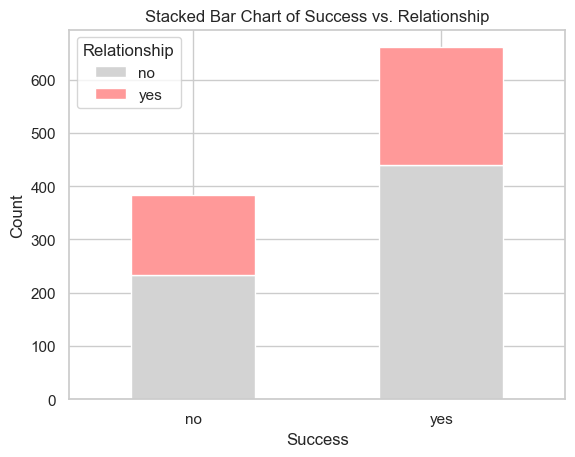

In [ ]:
# Create a stacked bar chart

# Calculate the counts of each combination of Success and Relationship
counts = student_df.groupby(['Success', 'romantic']).size().unstack(fill_value=0)
custom_palette = {'yes': '#ff9999', 'no':'#D3D3D3'}

# Create a stacked bar chart
plt.figure(figsize=(4, 2))
counts.plot(kind='bar', stacked=True, color=[custom_palette.get(col, col) for col in counts.columns],rot=0)


plt.xlabel('Success')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Success vs. Relationship')
plt.legend(title='Relationship')


plt.show()


In [ ]:
# Calculate percentage of romantic in student success
romantic_success_students = student_df[(student_df['Success']=='yes')&(student_df['romantic']=='yes')]
romantic_unsuccess_students = student_df[(student_df['Success']=='no')&(student_df['romantic']=='yes' )]
perc_rom_success = round(len(romantic_success_students)/len(student_df[student_df['Success']=='yes']) *100,2)
perc_rom_unsuccess = round(len(romantic_unsuccess_students)/len(student_df[student_df['Success']=='no']) *100,2)
print("The percentage of Successful student with romantic relationship is " + str(perc_rom_success)+'%')
print("The percentage of Unsuccessful student with romantic relationship is " + str(perc_rom_unsuccess)+'%')

The percentage of Successful student with romantic relationship is 33.43%
The percentage of Unsuccessful student with romantic relationship is 39.16%


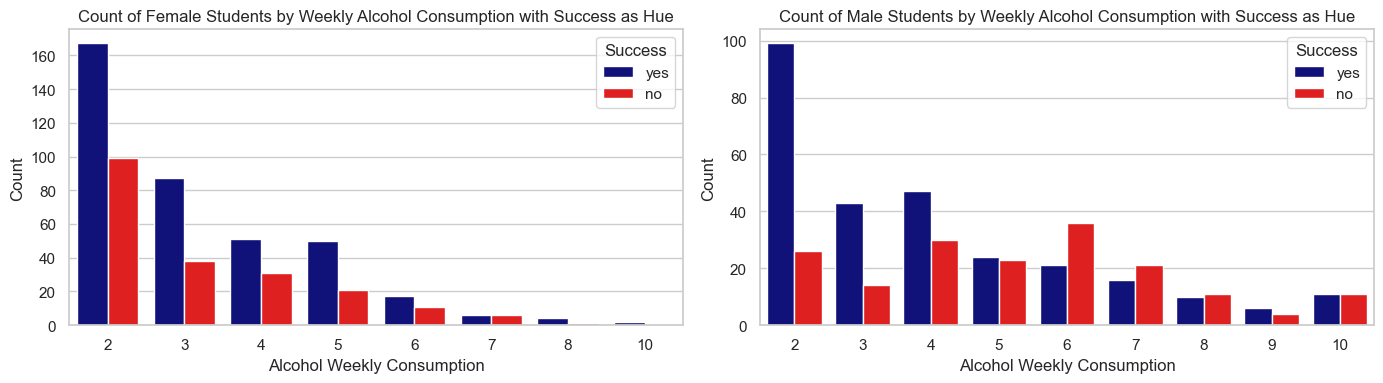

In [ ]:
# Define a custom color palette with blue for 'yes' and red for 'no'
custom_palette = {"yes": "darkblue", "no": "red"}

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Plot for Female Students
sns.countplot(data=student_df[student_df['sex'] == 'F'],
              x='AlWeekly_Cons', hue='Success', palette=custom_palette,hue_order=['yes', 'no'], ax=axes[0])
axes[0].set_xlabel('Alcohol Weekly Consumption')
axes[0].set_ylabel('Count')
axes[0].set_title('Count of Female Students by Weekly Alcohol Consumption with Success as Hue')

# Plot for Male Students
sns.countplot(data=student_df[student_df['sex'] == 'M'],
              x='AlWeekly_Cons', hue='Success', palette=custom_palette,hue_order=['yes', 'no'],ax=axes[1])
axes[1].set_xlabel('Alcohol Weekly Consumption')
axes[1].set_ylabel('Count')
axes[1].set_title('Count of Male Students by Weekly Alcohol Consumption with Success as Hue')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()


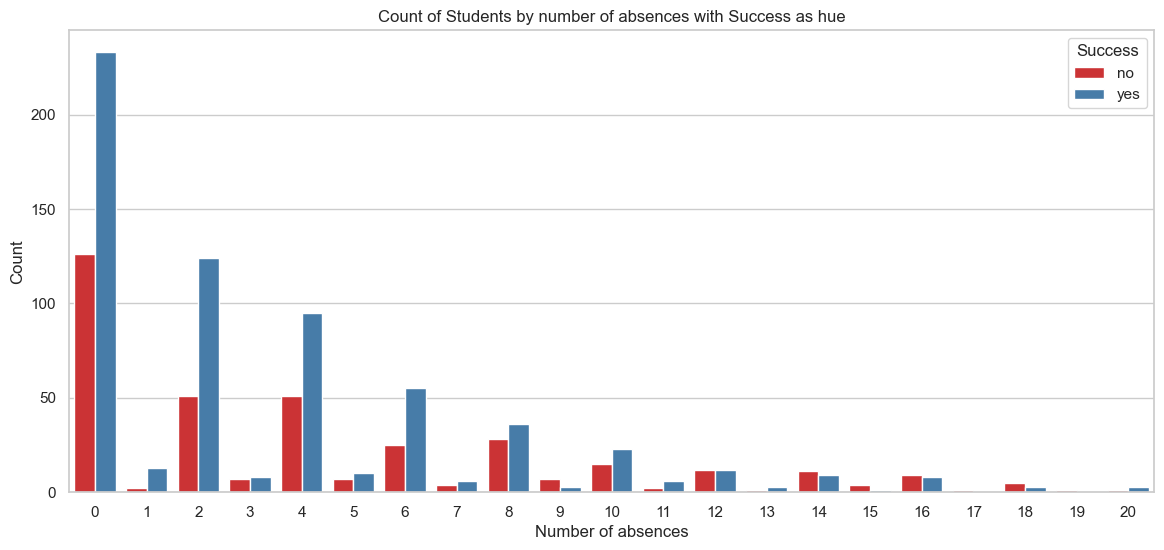

In [ ]:
# Number of absences between successful and unsuccessful students
x_order = list(range(21))  # Values from 0 to 75

plt.figure(figsize=(14, 6))  # Adjust the figure size to accommodate all values

sns.countplot(data=student_df, x='absences', hue='Success', palette='Set1', order=x_order)

plt.xlabel('Number of absences')
plt.ylabel('Count')
plt.title('Count of Students by number of absences with Success as hue')
plt.legend(title='Success')

# Rotate x-axis labels for better readability


plt.show()


From the graph, the more students absences, more chances students will fail

In [ ]:
#student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
# Data Reduction - Dimension

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and apply label encoding
for column in student_df.columns:
    if student_df[column].dtype == 'object':  # Check if the column contains categorical data
        student_df[column] = label_encoder.fit_transform(student_df[column])

# Now, 'data' contains the label encoded values
print(student_df)

     school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0         0    0   18        1        0        0     4     4     0     4  ...   
1         0    0   17        1        0        1     1     1     0     2  ...   
2         0    0   15        1        1        1     1     1     0     2  ...   
3         0    0   15        1        0        1     4     2     1     3  ...   
4         0    0   16        1        0        1     3     3     2     2  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
644       1    0   19        0        0        1     2     3     3     2  ...   
645       1    0   18        1        1        1     3     1     4     3  ...   
646       1    0   18        1        0        1     1     1     2     2  ...   
647       1    1   17        1        1        1     3     1     3     3  ...   
648       1    1   18        0        1        1     3     2     3     2  ...   

     internet  romantic  fa

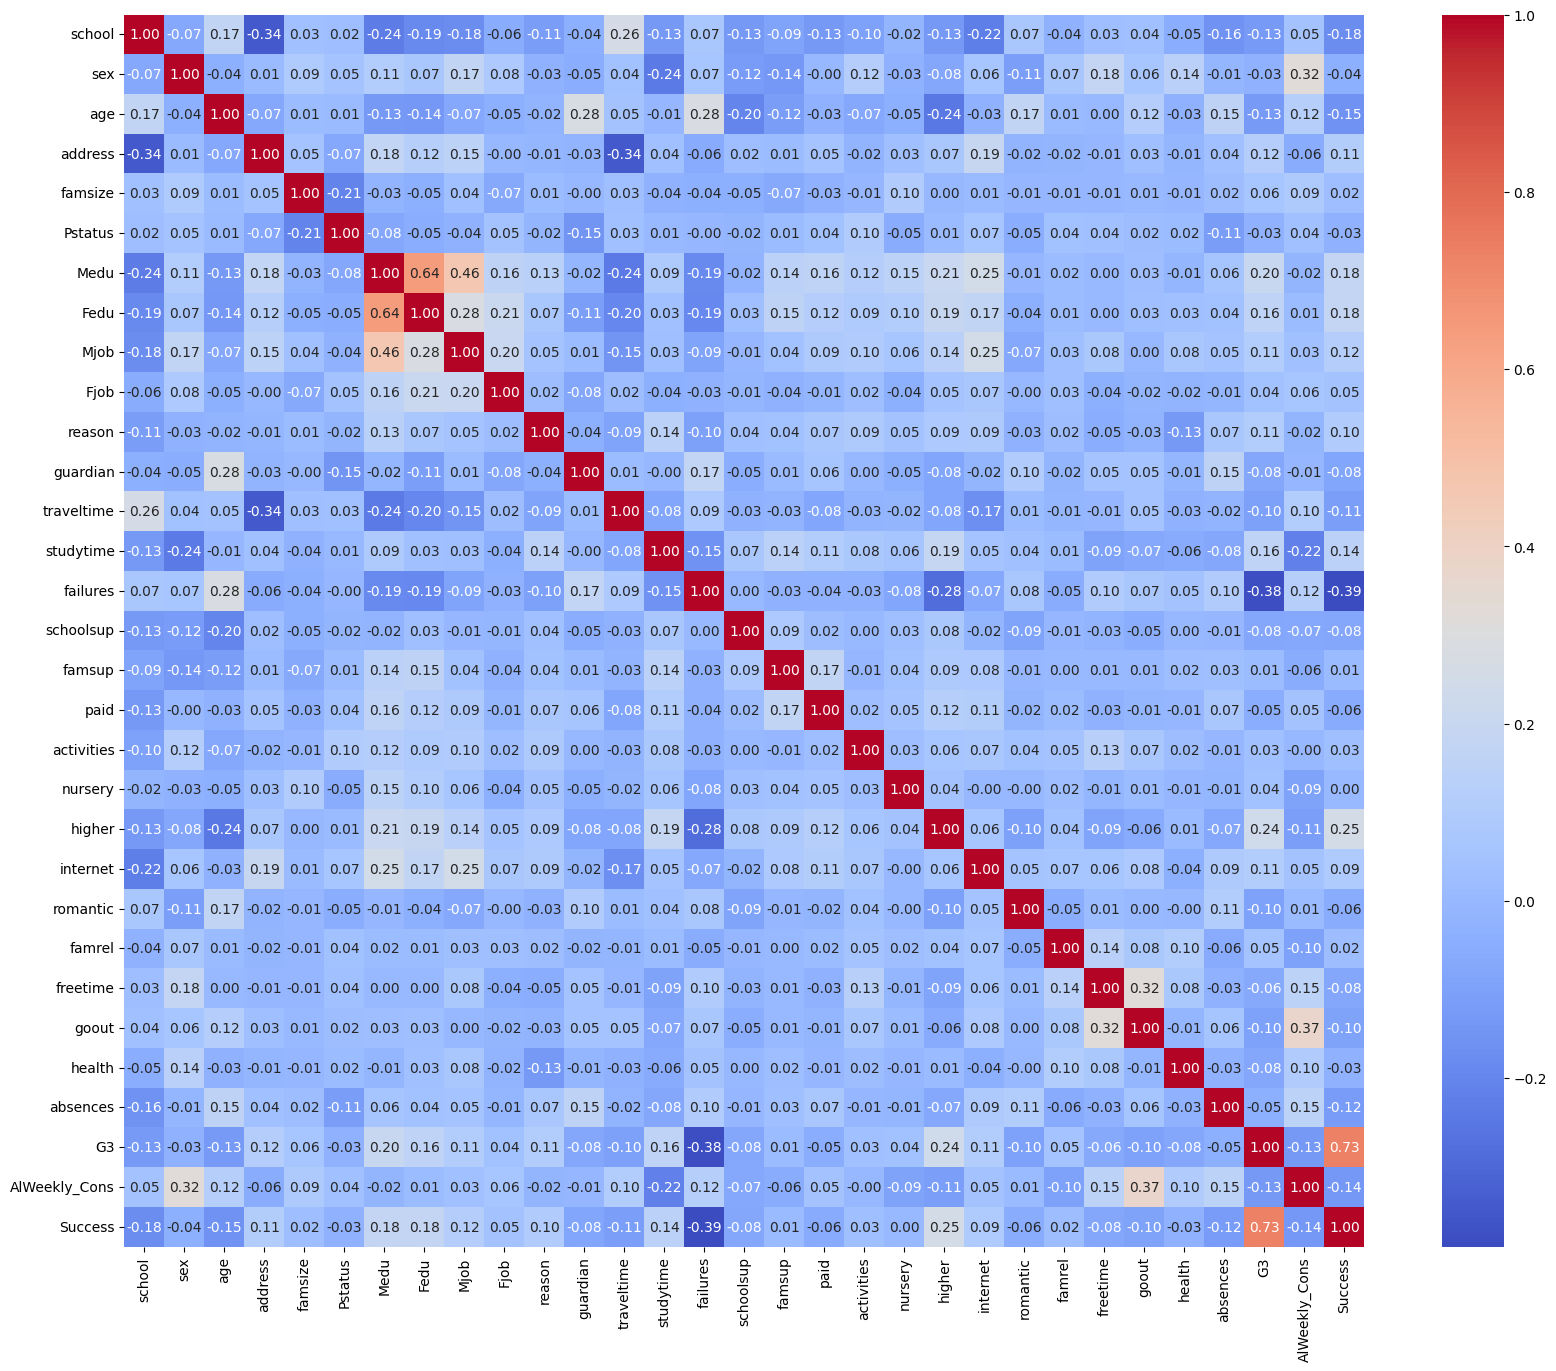

In [9]:
# To check the correlation between all the variables and reduce highly- correlated variables.
correlation_matrix = student_df.corr()
#print(correlation_matrix)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [33]:
#Dropping grades as those will be our output variables
#student_df1 = student_df.drop('G1',axis=1)
#student_df1 = student_df1.drop('G2',axis=1)
student_df1 = student_df.drop('G3',axis=1)
student_df1 = student_df1.drop('failures',axis=1)

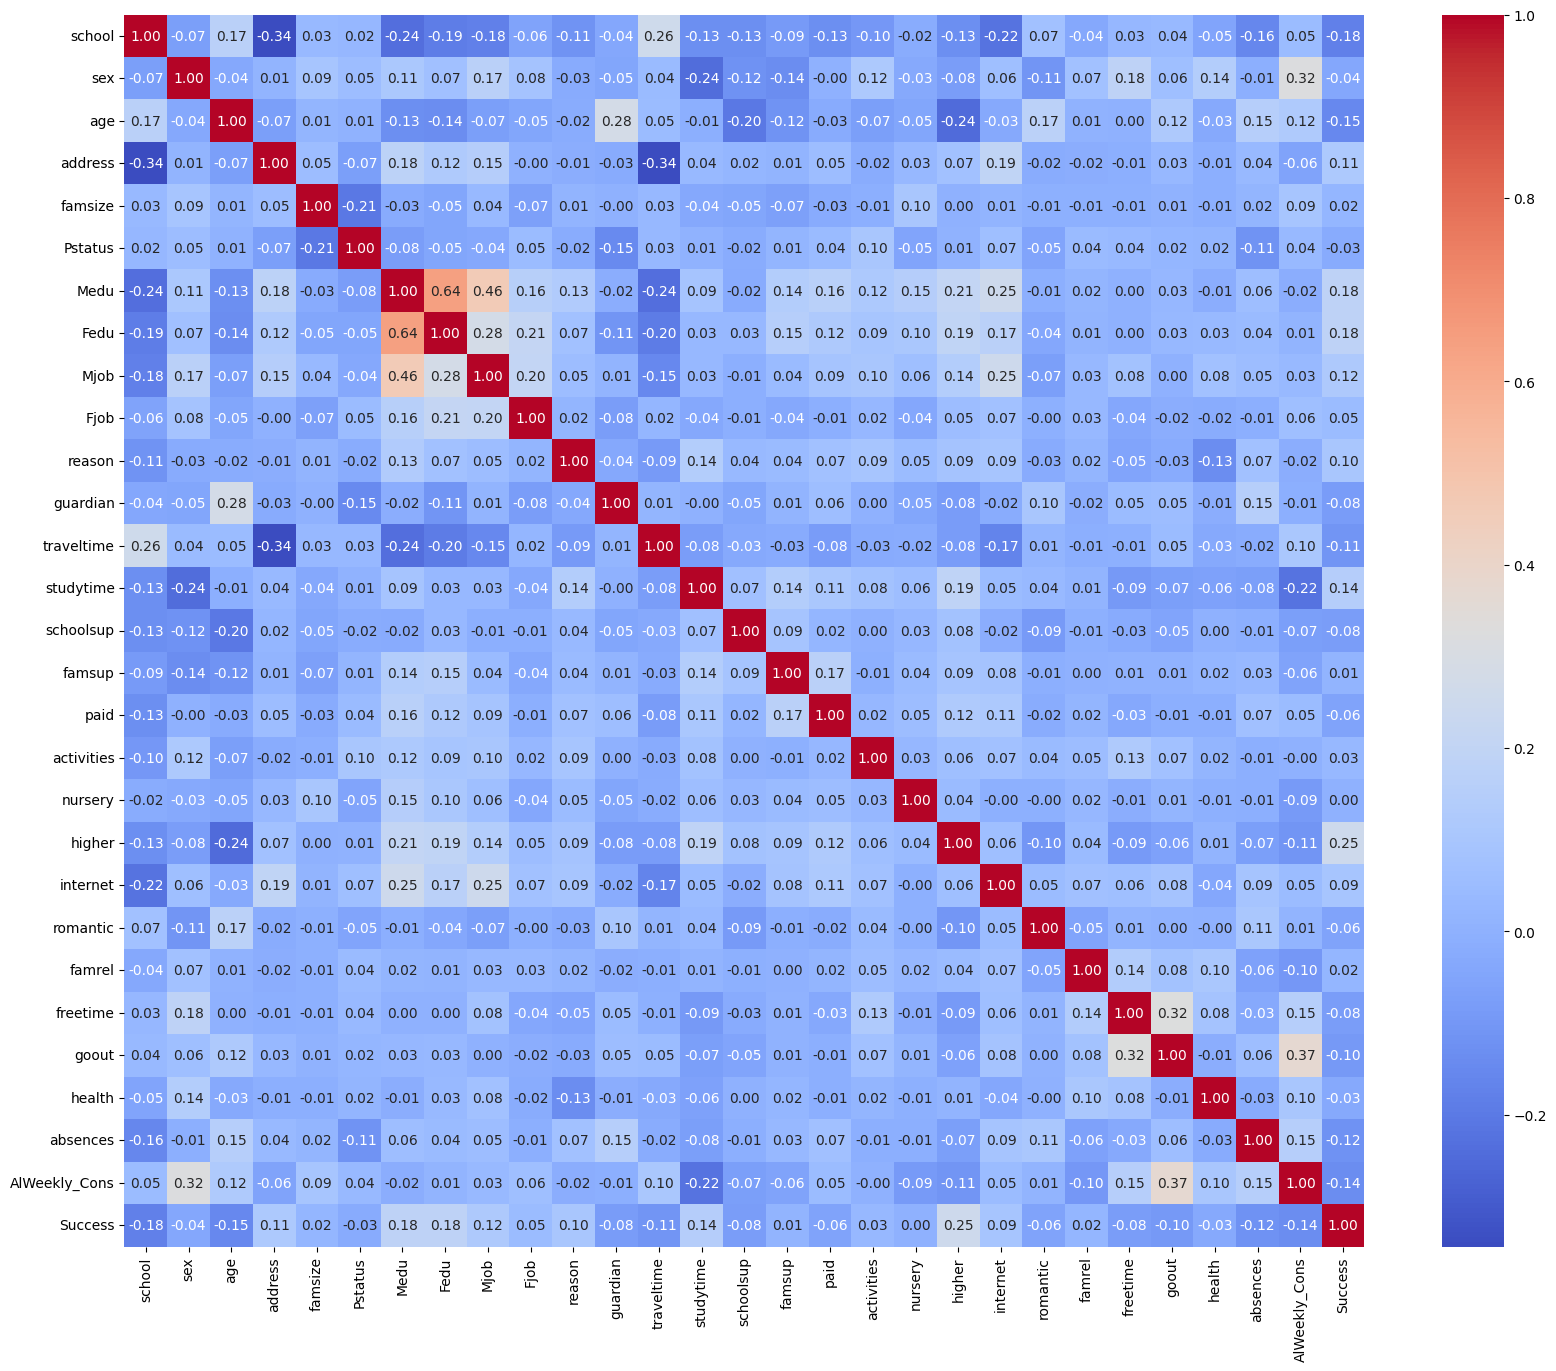

In [22]:
# To check the correlation between all the variables and reduce highly- correlated variables.
correlation_matrix = student_df1.corr()
#print(correlation_matrix)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [ ]:
#The heatmap shows that the variables are not highly correlated, So we cannot reduce variables using correlation metrics

#Second approach we have applied is to sort the features by their importance and pick the top ones for further analysis

In [29]:
student_df1 = student_df1.drop('Success',axis=1)

X = student_df1

y = student_df['Success']

# Create a RandomForestClassifier to estimate feature importances
clf = RandomForestClassifier()
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Sort features by importance and select the top 20
top_20_feature_indices = feature_importances.argsort()[-13:][::-1]
top_20_features = X.iloc[:, top_20_feature_indices]
print(top_20_features.columns)

Index(['absences', 'AlWeekly_Cons', 'age', 'Medu', 'Fedu', 'freetime', 'goout',
       'paid', 'Mjob', 'health', 'studytime', 'higher', 'famrel'],
      dtype='object')


In [38]:
student_df2 = student_df1.drop('AlWeekly_Cons',axis=1)

X = student_df2

y = student_df['AlWeekly_Cons']

# Create a RandomForestClassifier to estimate feature importances
clf = RandomForestClassifier()
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Sort features by importance and select the top 20
top_20_feature_indices = feature_importances.argsort()[-13:][::-1]
top_20_features = X.iloc[:, top_20_feature_indices]
print(top_20_features.columns)

Index(['goout', 'absences', 'age', 'Mjob', 'health', 'freetime', 'Fedu',
       'famrel', 'Medu', 'reason', 'studytime', 'Fjob', 'traveltime'],
      dtype='object')
